In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

In [14]:
plt.style.use("../matplotlib_style.txt")

In [2]:
summary_df = pd.read_csv("../data/summary_df", index_col=0)
summary_df["beta_fwd_norm"] = summary_df["beta_fwd"]/ 100
summary_df["beta_bwd_norm"] =  summary_df["beta_bwd"]/ 100
summary_df["lbound_bwd_norm"] = (summary_df["lbound_bwd"]  - 1)/4
summary_df["hbound_bwd_nrom"] = (summary_df["hbound_bwd"]  - 1)/4

summary_df["MetaRL_norm"] = (summary_df["MetaRL"] - summary_df["MetaRL"].min())/(summary_df["MetaRL"].max() - summary_df["MetaRL"].min())
summary_df["fwd_perf_norm"] = (summary_df["fwd_perf"] - summary_df["fwd_perf"].min())/(summary_df["fwd_perf"].max() - summary_df["fwd_perf"].min())
summary_df["bwd_perf_norm"] = (summary_df["bwd_perf"] - summary_df["bwd_perf"].min())/(summary_df["bwd_perf"].max() - summary_df["bwd_perf"].min())


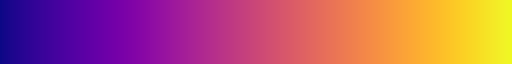

In [33]:
cmap = plt.get_cmap("plasma")
cmap

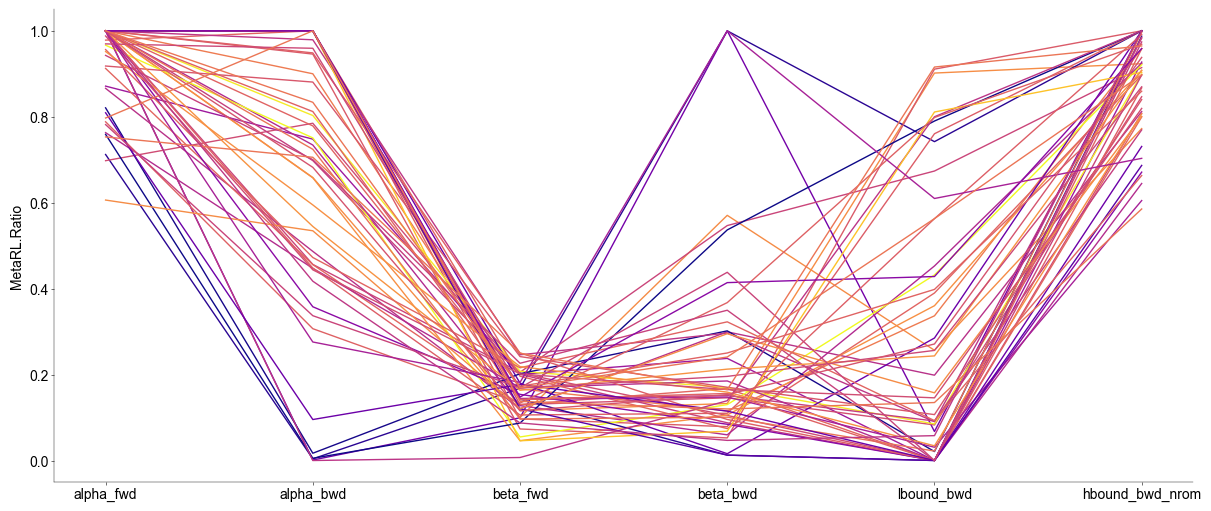

In [32]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize = (12,5) )

x = np.zeros((len(summary_df), 6))
y = np.zeros((len(summary_df), 6))

for index, row in summary_df.iterrows():
    x[index, :] = np.arange(1, 7)
    y[index,:] = [row["alpha_fwd"], row["alpha_bwd"], row["beta_fwd_norm"], row["beta_bwd_norm"], row["lbound_bwd_norm"], row["hbound_bwd_nrom"]]
    plt.plot(x[index,:],y[index,:], c = cmap(row["MetaRL_norm"]))

    
plt.xticks(np.arange(1,7), ['alpha_fwd', 'alpha_bwd', 'beta_fwd', "beta_bwd", "lbound_bwd", "hbound_bwd_nrom"])

  
  
plt.ylabel("MetaRL.Ratio")
plt.show()

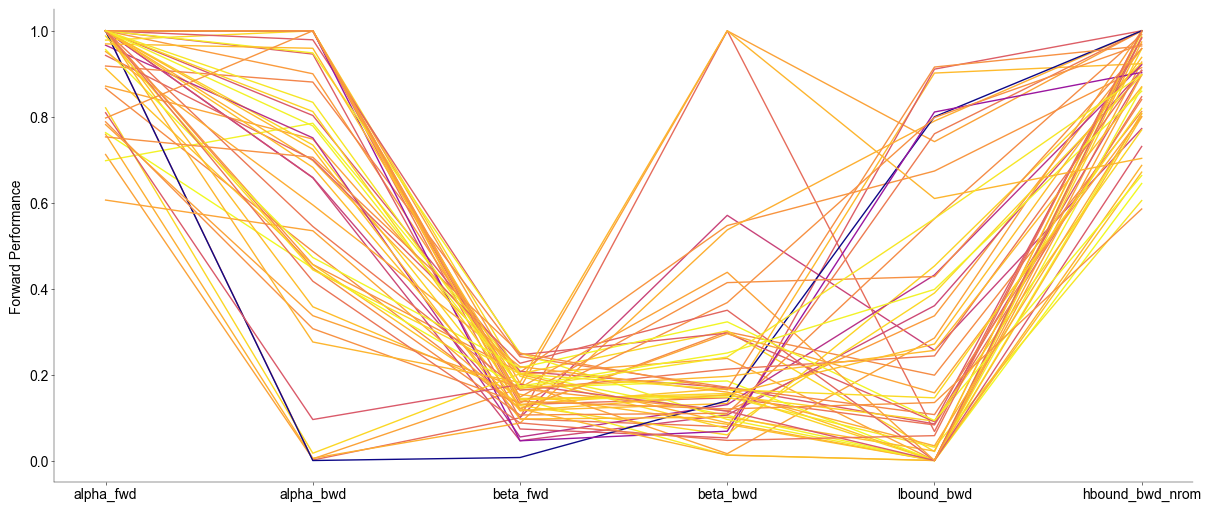

In [37]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize = (12,5) )

x = np.zeros((len(summary_df), 6))
y = np.zeros((len(summary_df), 6))

for index, row in summary_df.iterrows():
    x[index, :] = np.arange(1, 7)
    y[index,:] = [row["alpha_fwd"], row["alpha_bwd"], row["beta_fwd_norm"], row["beta_bwd_norm"], row["lbound_bwd_norm"], row["hbound_bwd_nrom"]]
    plt.plot(x[index,:],y[index,:], c = cmap(row["fwd_perf_norm"]))

    
plt.xticks(np.arange(1,7), ['alpha_fwd', 'alpha_bwd', 'beta_fwd', "beta_bwd", "lbound_bwd", "hbound_bwd_nrom"])

  
  
plt.ylabel("Forward Performance")
plt.show()

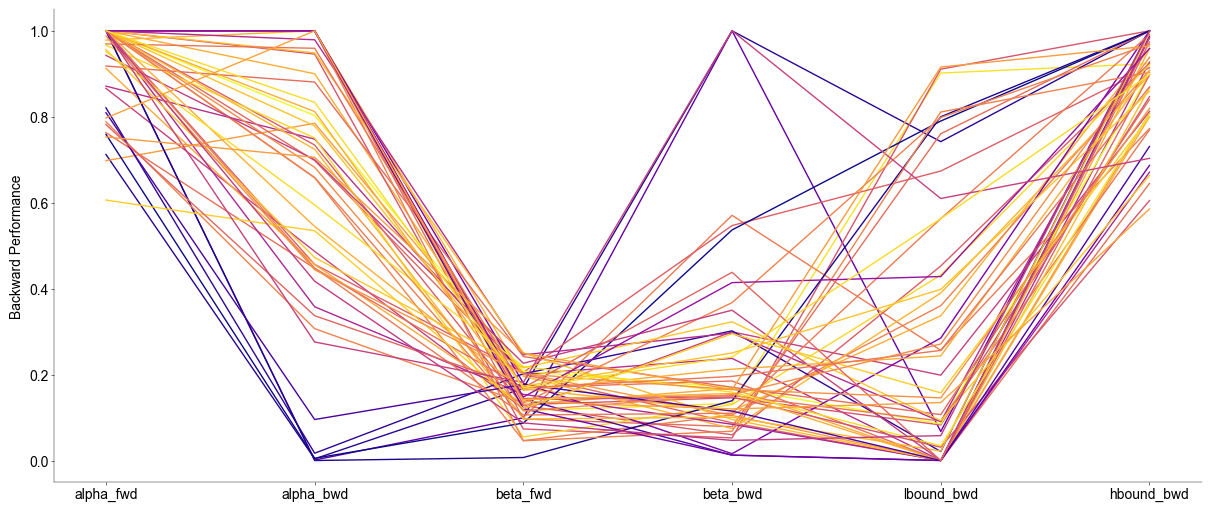

In [30]:
fig, ax = plt.subplots(figsize = (12,5) )

x = np.zeros((len(summary_df), 6))
y = np.zeros((len(summary_df), 6))

for index, row in summary_df.iterrows():
    x[index, :] = np.arange(1, 7)
    y[index,:] = [row["alpha_fwd"], row["alpha_bwd"], row["beta_fwd_norm"], row["beta_bwd_norm"], row["lbound_bwd_norm"], row["hbound_bwd_nrom"]]
    plt.plot(x[index,:],y[index,:], c = cmap(row["bwd_perf_norm"]))

    
plt.xticks(np.arange(1,7), ['alpha_fwd', 'alpha_bwd', 'beta_fwd', "beta_bwd", "lbound_bwd", "hbound_bwd"])

    
plt.ylabel("Backward Performance")
plt.show()

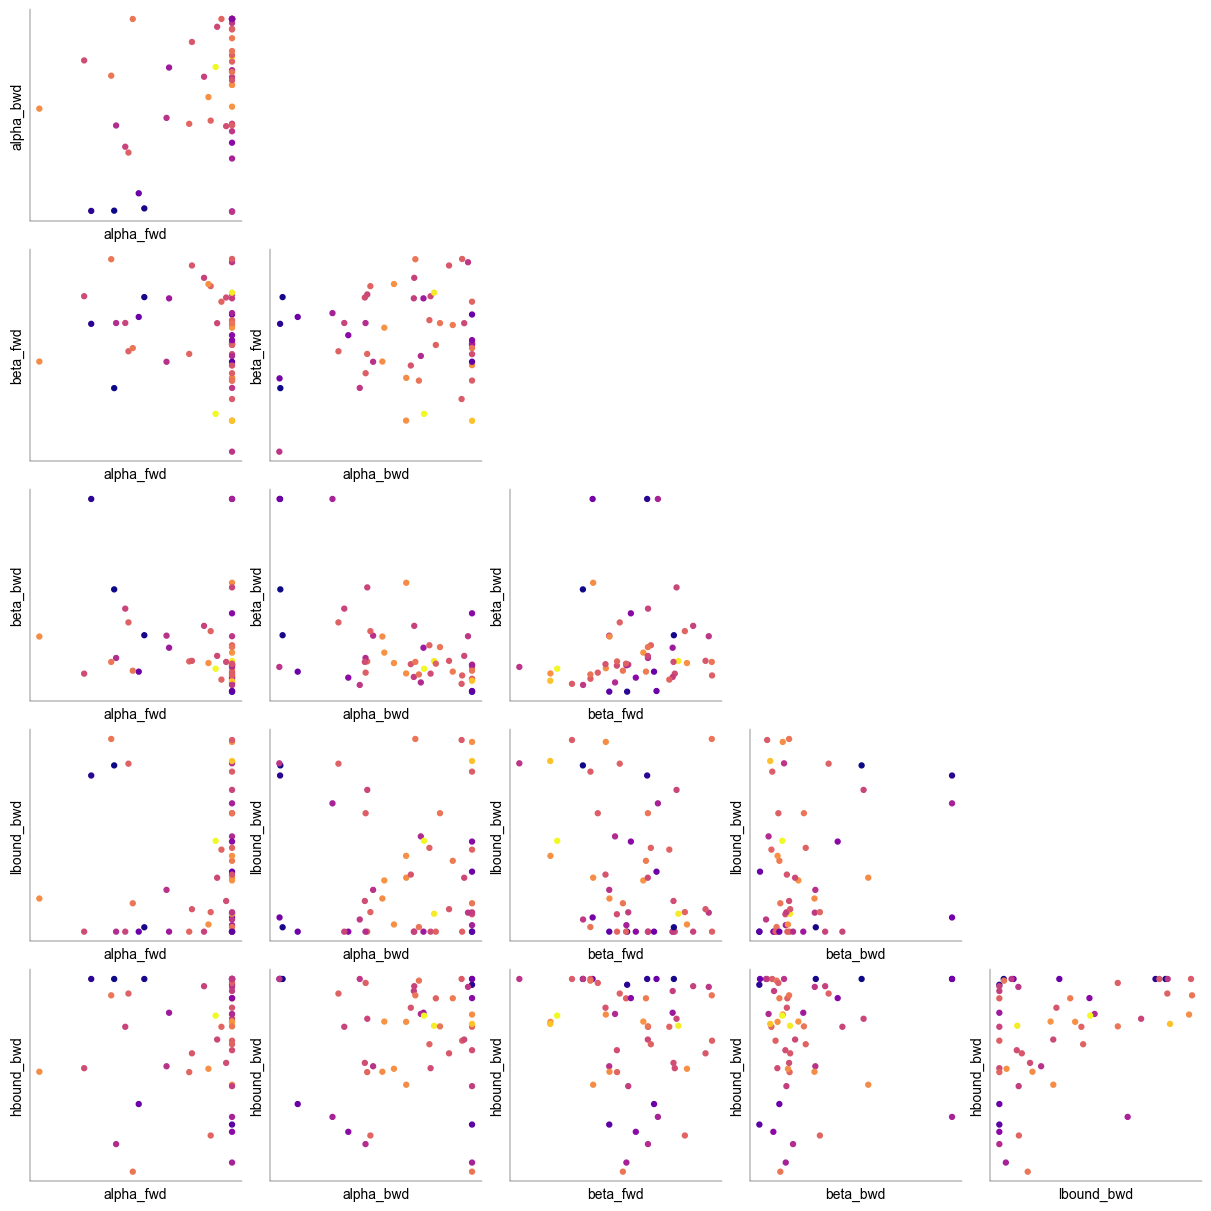

In [34]:
mosaic = []

cmap = plt.get_cmap("plasma")


labels = ['alpha_fwd', 'alpha_bwd', 'beta_fwd', "beta_bwd", "lbound_bwd", "hbound_bwd"]
for i in range(1,len(labels)):
    ls = []
    for j in range(len(labels)-1):
        if i > j :
            ls.append(labels[i] + " vs " + labels[j])
        else:
            ls.append(".")
    mosaic.append(ls)
    
fig, ax = plt.subplot_mosaic(mosaic=mosaic, figsize=(12, 12), layout="constrained")

point_colors = [cmap(row["MetaRL_norm"]) for index, row in summary_df.iterrows()] 
    
for ms in np.ravel(mosaic):
    if ms == ".":
        continue
    y, x = ms.split(" vs ")

    ax[ms].set_xlabel(x)
    ax[ms].set_ylabel(y)
    # ax[m].set_xlim((-1500, 1500))
    # ax[m].set_ylim((-1500, 1500))
    ax[ms].set_xticks([])
    ax[ms].set_yticks([])
    
    ax[ms].scatter(
        summary_df[x],
        summary_df[y],
        s=50,
        color=point_colors,
    )


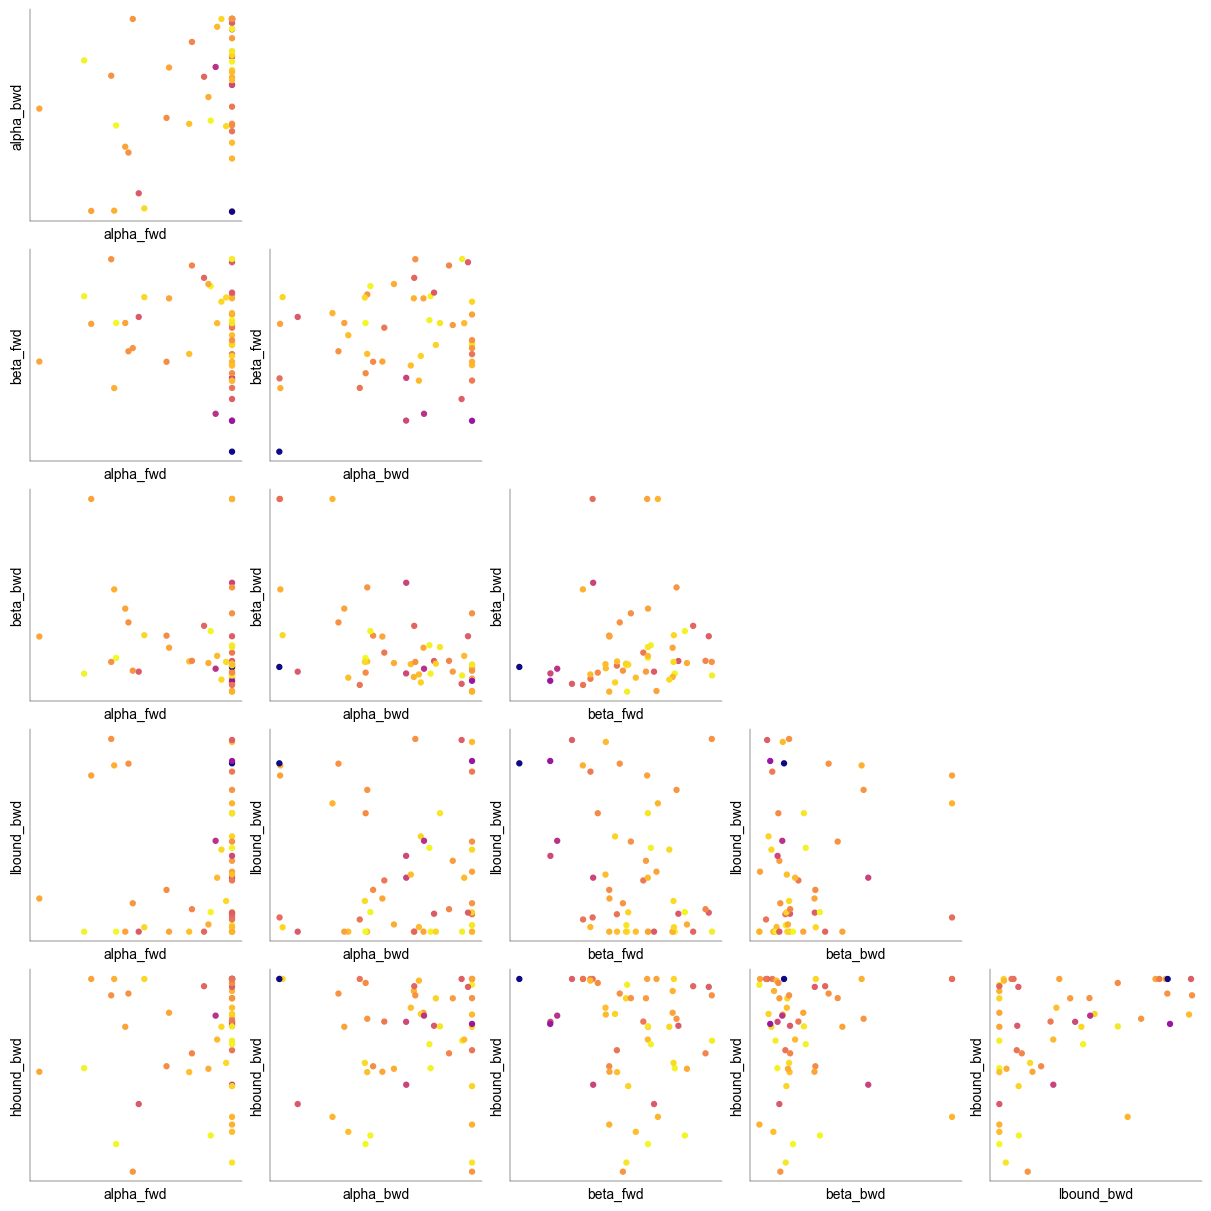

In [35]:
fig, ax = plt.subplot_mosaic(mosaic=mosaic, figsize=(12, 12), layout="constrained")

point_colors = [cmap(row["fwd_perf_norm"]) for index, row in summary_df.iterrows()] 
    
for ms in np.ravel(mosaic):
    if ms == ".":
        continue
    y, x = ms.split(" vs ")

    ax[ms].set_xlabel(x)
    ax[ms].set_ylabel(y)
    # ax[m].set_xlim((-1500, 1500))
    # ax[m].set_ylim((-1500, 1500))
    ax[ms].set_xticks([])
    ax[ms].set_yticks([])
    
    ax[ms].scatter(
        summary_df[x],
        summary_df[y],
        s=50,
        color=point_colors,
    )


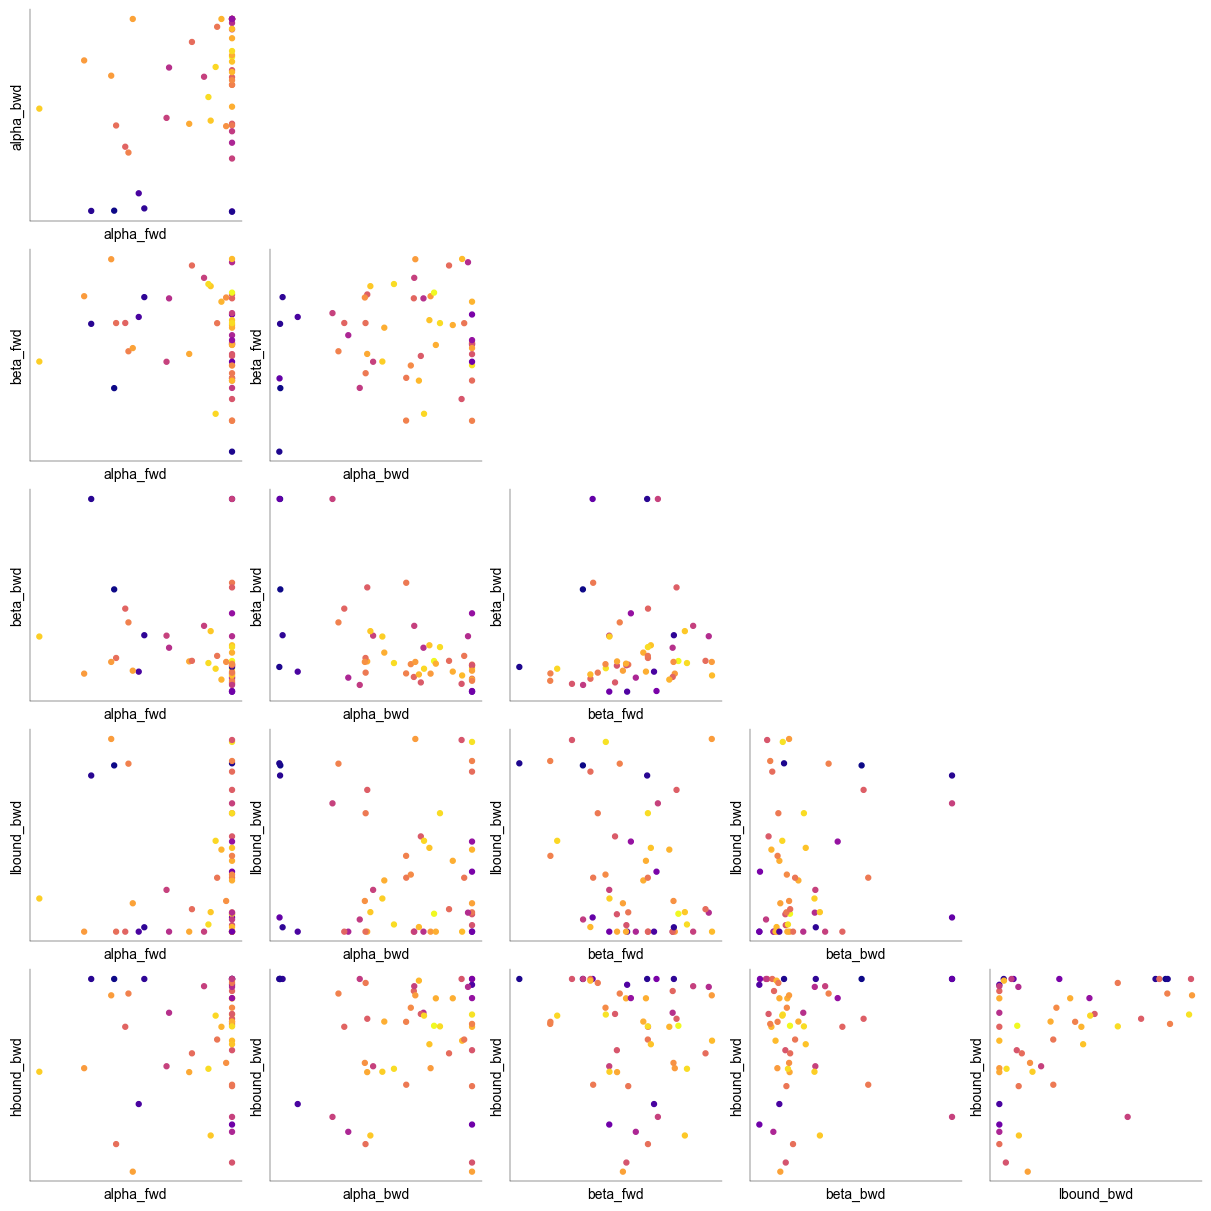

In [38]:
fig, ax = plt.subplot_mosaic(mosaic=mosaic, figsize=(12, 12), layout="constrained")

point_colors = [cmap(row["bwd_perf_norm"]) for index, row in summary_df.iterrows()] 
    
for ms in np.ravel(mosaic):
    if ms == ".":
        continue
    y, x = ms.split(" vs ")

    ax[ms].set_xlabel(x)
    ax[ms].set_ylabel(y)
    # ax[m].set_xlim((-1500, 1500))
    # ax[m].set_ylim((-1500, 1500))
    ax[ms].set_xticks([])
    ax[ms].set_yticks([])
    
    ax[ms].scatter(
        summary_df[x],
        summary_df[y],
        s=50,
        color=point_colors,
    )
